In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [117]:
altura_imagem = 231
comprimento = 195

In [118]:
# Criando o path para onde as iamgens estão
famousim = "imagens_artistas/"
# Criando uma lista para adicionar as imagens
famous_images = []

# Fazendo um for loop para iterar sobre todas as imagens
for image in (os.listdir(famousim)): 
    # Adionanco o path com cada imagem para termos o arquivo da imgens
    path = os.path.join(famousim, image)
    # Lendo a imagem
    img = cv2.imread(path)
    # Transformando a imagem em preto e branco 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Adicionando a imgem na lista
    famous_images.append(img)

# Transformando a lista num array
famous_images_np = np.array(famous_images)
print(famous_images_np.shape)

(20, 231, 195)


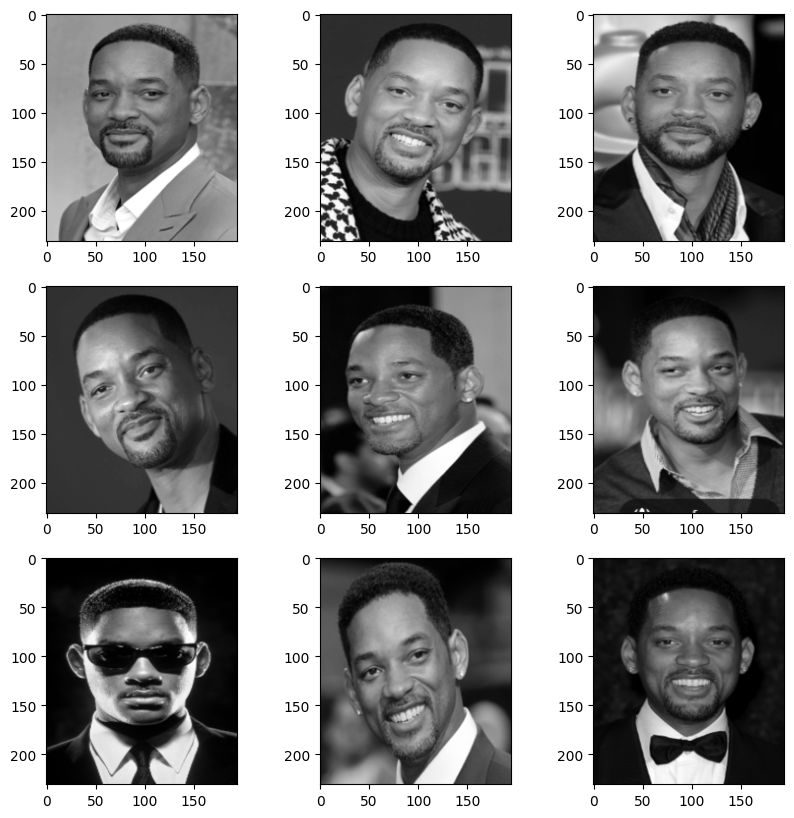

In [180]:
# Plotando a imagem
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(famous_images_np[count], cmap='gray')
        count += 1

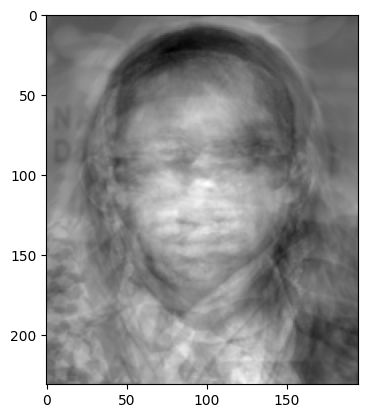

In [182]:
# Cada imagem está armazenada em "3 dimensões", cada foto está numa lista, e cada lista é uma lista de listas
# Vamos transformar a imagem num vetor coluna muito grande.
train_famous_np_matrix = famous_images_np.reshape(famous_images_np.shape[0], famous_images_np.shape[1]*famous_images_np.shape[2])
# calculamos a face média
mean_train_face = np.mean(train_famous_np_matrix, axis=0)
# Criamos uma matriz sem a a face média
centered_train_face = train_famous_np_matrix - mean_train_face

# Mostrando a face média
plt.figure()
plt.imshow(mean_train_face.reshape(altura_imagem,comprimento), cmap='gray')


In [183]:
U_Face_Famous, D_Face_Famous, V_Face_Famous = np.linalg.svd(centered_train_face, full_matrices=False)

In [184]:
print(D_Face_Famous.shape)
print(U_Face_Famous.shape)
print(V_Face_Famous.shape)
print(D_Face_Famous)
print(centered_train_face.shape)

(20,)
(20, 20)
(20, 45045)
[3.73224400e+04 2.04241039e+04 1.75016567e+04 1.63712912e+04
 1.42658271e+04 1.31123807e+04 1.19981082e+04 1.13419765e+04
 1.09405719e+04 1.05224406e+04 9.83027975e+03 9.40222868e+03
 8.82558903e+03 8.08262565e+03 7.57207860e+03 6.96838425e+03
 6.69720562e+03 6.09218399e+03 5.59333186e+03 1.40956697e-11]
(20, 45045)


In [185]:
x = sum(D_Face_Famous)
print(x) 
(np.sum(D_Face_Famous[0:17]))/x

232864.70413946893


0.9498184326133883

In [186]:
# Vamos obter a quantidade de componentes que queremos de nossa matriz. como temos apenas 17
C_Faces_TRAIN = V_Face_Famous[:17]
eigen_faces_train = C_Faces_TRAIN.reshape((-1, altura_imagem, comprimento))

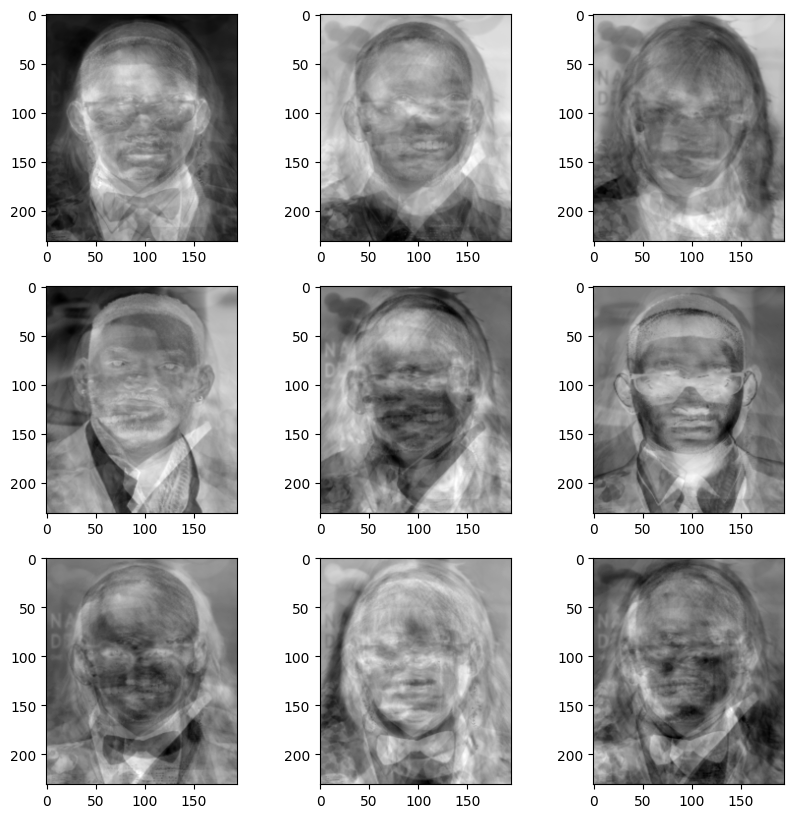

In [187]:
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(eigen_faces_train[count], cmap='gray')
        count += 1

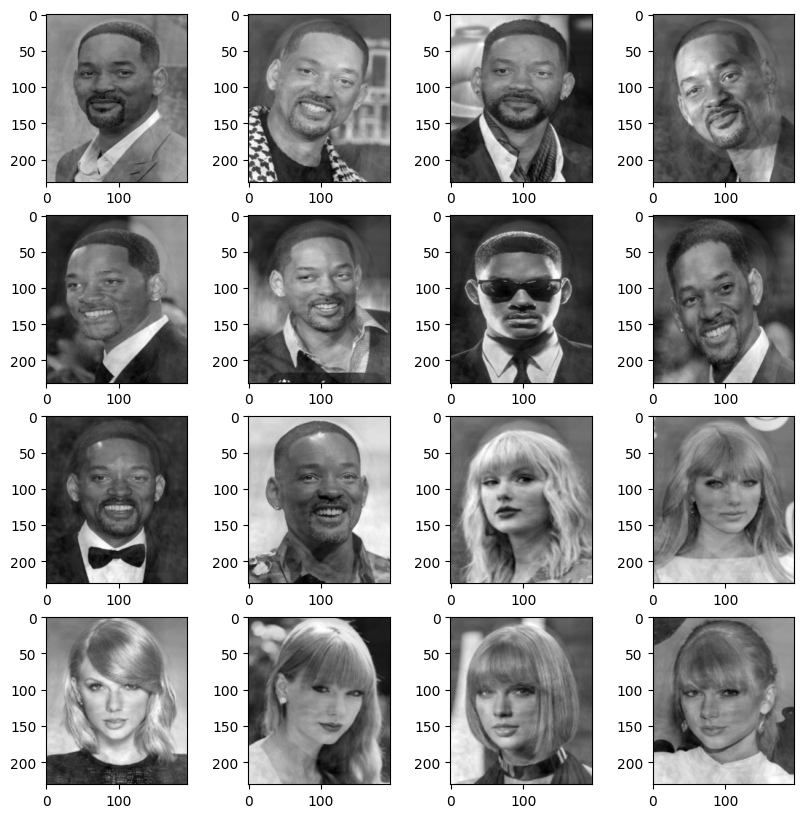

In [191]:
numero_imagens = 4
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(centered_train_face[count].reshape(altura_imagem,comprimento), cmap='gray')
        count += 1